# Project 4: Partial differential equations (PDEs)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
import itertools

## 1. Laplace equation (10 points)

In [ ]:
N_max = 100

In [ ]:
U = np.zeros((N_max, N_max))

U[1:-1, 0] = 100

In [ ]:
U

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [ ]:
epsilon_max = 1e-3

In [ ]:
def Jacobi(U_old, epsilon_max):
  N = len(U_old[0])
  U_new = cp.deepcopy(U_old)
  
  epsilon = np.ones((N, N))
  epsilon[0, :] = 0
  epsilon[:, 0] = 0
  epsilon[-1, :] = 0
  epsilon[:, -1] = 0

  tol = np.full((N, N), epsilon_max)
  
  count = 0
  mean_err = []
  max_err = []

  while np.any(epsilon > tol): 

    for i, j in itertools.product(range(1, N-1), range(1, N-1)):
      U_new[i, j] = 1/4 * ( U_old[i + 1, j] + U_old[i - 1, j] + U_old[i, j + 1] + U_old[i, j - 1]) 
      epsilon[i, j] = np.abs(U_old[i, j] - U_new[i, j])
    
    U_old = cp.deepcopy(U_new)

    count = count + 1
    mean_err.append(np.mean(epsilon))
    max_err.append(np.amax(epsilon))

  return U_new, count, mean_err, max_err

In [ ]:
#check condition after 10th iteration

In [ ]:
def Gauss_Seidel(U_old, epsilon_max):
  N = len(U_old[0])
  U = cp.deepcopy(U_old)

  epsilon = np.ones((N, N))
  epsilon[0, :] = 0
  epsilon[:, 0] = 0
  epsilon[-1, :] = 0
  epsilon[:, -1] = 0

  tol = np.full((N, N), epsilon_max)

  count = 0
  mean_err = []
  max_err = []

  while np.any(epsilon > tol): 
    for i, j in itertools.product(range(1, N-1), range(1, N-1)):
      ij_new = 1/4 * ( U[i + 1, j] + U[i - 1, j] + U[i, j + 1] + U[i, j - 1])
      epsilon[i, j] = np.abs(U[i, j] - ij_new)
      U[i, j] = ij_new

    count = count + 1
    mean_err.append(np.mean(epsilon))
    max_err.append(np.amax(epsilon))
      
  return U, count, mean_err, max_err

In [ ]:
def SOR(U_old, alpha, epsilon_max):
  N = len(U_old[0])
  U = cp.deepcopy(U_old)

  epsilon = np.ones((N, N))
  epsilon[0, :] = 0
  epsilon[:, 0] = 0
  epsilon[-1, :] = 0
  epsilon[:, -1] = 0

  tol = np.full((N, N), epsilon_max)

  count = 0
  mean_err = []
  max_err = []
    
  while np.any(epsilon > tol): 
    for i, j in itertools.product(range(1, N-1), range(1, N-1)):
      r = 1/4 * ( U[i + 1, j] + U[i - 1, j] + U[i, j + 1] + U[i, j - 1]) - U[i, j]
      ij_new = U[i, j] + alpha * r
      epsilon[i, j] = np.abs(U[i, j] - ij_new)
      U[i, j] = ij_new

    count = count + 1
    mean_err.append(np.mean(epsilon))
    max_err.append(np.amax(epsilon))

  return U, count, mean_err, max_err

In [ ]:
test_Jacobi = Jacobi(U, epsilon_max)

In [ ]:
test_Jacobi[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+02, 4.99868029e+01, 3.02083425e+01, ...,
        1.84207924e-02, 9.20358519e-03, 0.00000000e+00],
       [1.00000000e+02, 6.97388735e+01, 4.99472202e+01, ...,
        3.68220174e-02, 1.83973959e-02, 0.00000000e+00],
       ...,
       [1.00000000e+02, 6.97388735e+01, 4.99472202e+01, ...,
        3.68220174e-02, 1.83973959e-02, 0.00000000e+00],
       [1.00000000e+02, 4.99868029e+01, 3.02083425e+01, ...,
        1.84207924e-02, 9.20358519e-03, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
np.shape(test_Jacobi[0])

(100, 100)

In [ ]:
U_Jacobi = test_Jacobi[0]

T_Jacobi = test_Jacobi[1]

mean_Jacobi = test_Jacobi[2]

max_Jacobi = test_Jacobi[3]

In [ ]:
t_Jacobi = np.arange(1, T_Jacobi + 1)

In [ ]:
test_GS = Gauss_Seidel(U, epsilon_max)

In [ ]:
U_GS = test_GS[0]

T_GS = test_GS[1]

mean_GS = test_GS[2]

max_GS = test_GS[3]

In [ ]:
t_GS = np.arange(1, T_GS + 1)

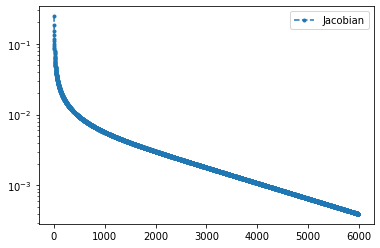

In [ ]:
plt.semilogy(t_Jacobi, mean_Jacobi, '.--', label = 'Jacobian')
#plt.loglog(t_GS, mean_GS, label = 'Gauss_Seidel')
plt.legend()
plt.show()

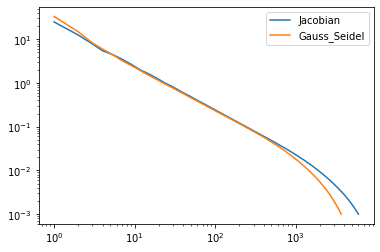

In [ ]:
plt.loglog(t_Jacobi, max_Jacobi, label = 'Jacobian')
plt.loglog(t_GS, max_GS, label = 'Gauss_Seidel')
plt.legend()
plt.show()

In [ ]:
alpha = [0.5, 1.0, 1.25, 1.5, 1.75, 1.99]

U_SOR = []

T_SOR = []

mean_SOR = []

max_SOR = []

In [ ]:
for a in alpha:
  test_SOR = SOR(U, a, epsilon_max)
  
  U_SOR.append(test_SOR[0])

  T_SOR.append(test_SOR[1])

  mean_SOR.append(test_SOR[2])

  max_SOR.append(test_SOR[3])


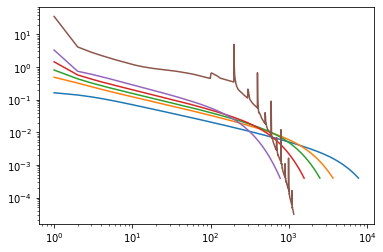

In [ ]:
for i in range(len(alpha)):
  t_SOR = np.arange(1, T_SOR[i] + 1)
  plt.loglog(t_SOR, mean_SOR[i])

In [ ]:
T_SOR

[7763, 3660, 2491, 1567, 775, 1157]

In [ ]:
L = 100

x = np.linspace(0, L, N_max)
y = np.linspace(0, L, N_max)

X, Y = np.meshgrid(x, y)

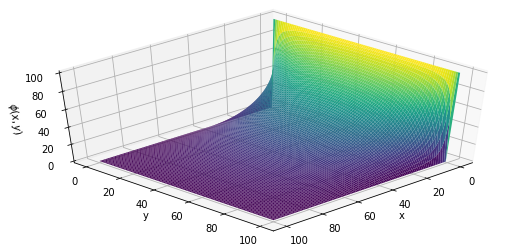

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, test_Jacobi[0], rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r'$\phi(x, y)$')
ax.view_init(45, 45)

In [ ]:
# no color coding

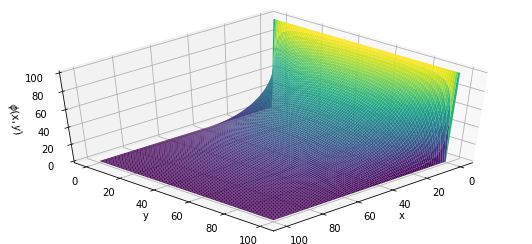

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, test_SOR[0], rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r'$\phi(x, y)$')
ax.view_init(45, 45)

In [ ]:
def phi_analytical(N):
  N_max = 100

  X = np.linspace(0, 100, N_max)
  Y = np.linspace(0, 100, N_max)
  phi = np.zeros((N_max, N_max))

  index = 0

  L = 100

  nn_x, nn_y = 0, 0
  for y in Y:
    for x in X:
      phi[nn_y, nn_x] = np.sum([400/(n * np.pi) * np.sin(n*np.pi * y/L) * np.exp(-n * np.pi * x) for n in range(1, N+1, 2)])   
      nn_x = nn_x + 1
    nn_y = nn_y + 1
    nn_x = 0

  return phi

In [ ]:
phi_1 = phi_analytical(1)
phi_10 = phi_analytical(10)
phi_100 = phi_analytical(100)
phi_1000 = phi_analytical(1000)

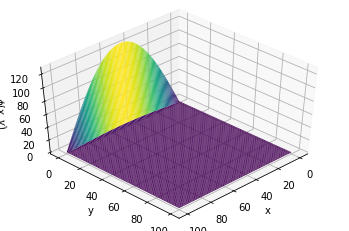

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, phi_1, rstride=1, cstride=1,
                  cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r'$\phi(x, y)$')
ax.view_init(45, 45)

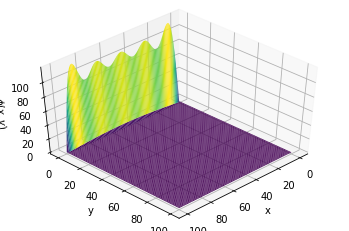

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, phi_10, rstride=1, cstride=1,
                  cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r'$\phi(x, y)$')
ax.view_init(45, 45)

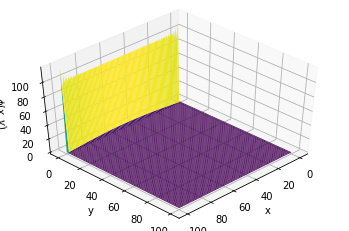

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, phi_100, rstride=1, cstride=1,
                  cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r'$\phi(x, y)$')
ax.view_init(45, 45)

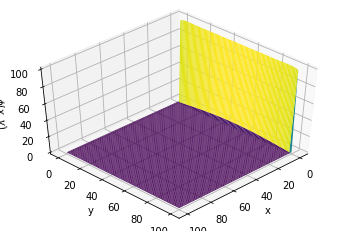

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, phi_1000, rstride=1, cstride=1,
                  cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r'$\phi(x, y)$')
ax.view_init(45, 45)

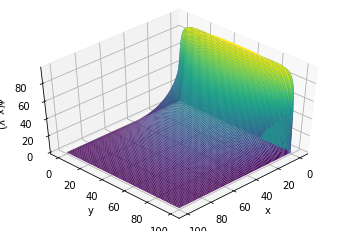

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, np.abs(phi_1000-U_Jacobi), rstride=1, cstride=1,
                  cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r'$\phi(x, y)$')
ax.view_init(45, 45)

## 2. Diffusion (16 points)

In [ ]:
L = 1
K = 210
C = 900
rho = 2700

In [ ]:
def T_i(x):
  return np.sin(np.pi * x/L)

In [ ]:
def T_initializer(dx, N_t):
  x_t0 = np.arange(0, L + dx, dx)
  T = np.zeros((N_t, len(x_t0))) 
  T[0, 1:-1] = T_i(x_t0[1:-1])
  return T

In [ ]:
def FTCS(T_0, N_t, dx, dt):
  T = cp.deepcopy(T_0)
  N_x = len(T_0[0])
  print(dt)
  for i in range(0, N_t-1):
    for j in range(1, N_x - 1):    
      eta = K * dt/(C * rho * dx**2)
      T[i + 1, j] = T[i, j] + eta * (T[i, j + 1] + T[i, j - 1] - 2 * T[i, j]) 

  return T

In [ ]:
T = T_initializer(0.01, 10000)

In [ ]:
test = FTCS(T, 10000, 0.01, 0.1)

0.1


In [ ]:
def T_exact(x, t):
  N_t = len(t)
  N_x = len(x)
  T = np.zeros((N_t, N_x)) 
  nn_x = 0
  nn_t = 0
  for time in t:
    for position in x:
      T[nn_t, nn_x] = np.sin(np.pi * position/L) * np.exp(-np.pi**2 * K * time/(L**2 * C * rho))
      nn_x = nn_x + 1

    nn_t = nn_t +1
    nn_x = 0
  return T

In [ ]:
x = np.arange(0, L + 0.01, 0.01)
t = np.linspace(0, 10000 * 0.1, 10000)

In [ ]:
X, Y = np.meshgrid(x, t)

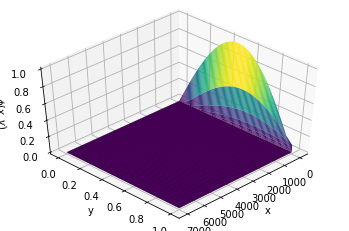

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(Y, X, test, rstride=1, cstride=1,
                  cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r'$\phi(x, y)$')
ax.view_init(45, 45)

In [ ]:
test_exact = T_exact(x, t)

In [ ]:
def epsilon(T1, T2):
  N_x = len(T1[0])
  T = cp.deepcopy(T1)
  T_exact = cp.deepcopy(T2)

  return 1/N_x * np.sum(np.abs(T[:, 1:N_x - 1] - T_exact[:, 1:N_x - 1]), axis = 1)

In [ ]:
err = epsilon(test, test_exact) 

In [ ]:
np.shape(err)

(10000,)

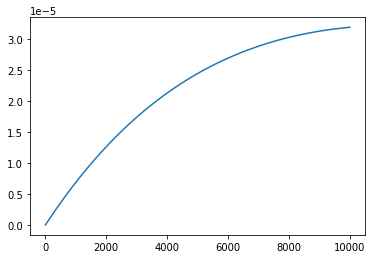

In [ ]:
plt.plot(np.arange(10000), err)

In [ ]:
err[99]

7.367614815449455e-07

In [ ]:
err[99]

0.6249646899373866

In [ ]:
err_list = []
dt_list = np.linspace(0.001, 0.7, 5)
for dt_temp in dt_list:
  T_temp = FTCS(T, 10000, 0.01, dt_temp)
  x = np.arange(0, L + 0.01, 0.01)
  t = np.linspace(0, 10000 * dt_temp, 10000)
  T_exact_temp =  T_exact(x, t)
  err_list.append(epsilon(T_temp, T_exact_temp) )

0.001
0.17575
0.3505
0.52525
0.7


In [ ]:
for index in range(len(dt_list)):
  print(err_list[index][99])

0.6302115413892765
0.6209795721008669
0.6118828419366951
0.6029193697787405
0.5940872035303816


In [ ]:
dt = 0.7
T_temp = FTCS(T)

TypeError: ignored

In [ ]:
x = np.arange(0, L + dx, dx)
t = np.linspace(0, N_t * dt, N_t)
T_exact_temp =  T_exact(x, t)

In [ ]:
a = []
a.append(1)
print(a)
a.append(2)
print(a)

[1]
[1, 2]


In [ ]:
print(T_exact_temp - T_temp)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.14107323e-02  6.27633209e-02 ...  1.21198739e-02
  -1.92265444e-02 -5.05769005e-02]
 [ 0.00000000e+00  3.14107055e-02  6.27904124e-02 ...  6.07613073e-02
   2.93413181e-02 -2.10957130e-03]
 ...
 [ 0.00000000e+00  3.11440401e-02  6.22573448e-02 ...  6.22573448e-02
   3.11440401e-02  1.21424793e-16]
 [ 0.00000000e+00  3.11440135e-02  6.22572917e-02 ...  6.22572917e-02
   3.11440135e-02  1.21424689e-16]
 [ 0.00000000e+00  3.11439870e-02  6.22572386e-02 ...  6.22572386e-02
   3.11439870e-02  1.21424585e-16]]


In [ ]:
print(T_exact_temp - T_temp)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  3.13920090e-02  4.37514676e-02 ...  1.84089459e-02
   2.71440537e-03 -1.29828140e-02]
 [ 0.00000000e+00  3.13732701e-02  6.27155786e-02 ...  3.40831506e-02
   1.05571068e-02 -1.29793556e-02]
 ...
 [ 0.00000000e+00  8.02862642e-05  1.60493296e-04 ...  1.60493296e-04
   8.02862642e-05  3.13021141e-19]
 [ 0.00000000e+00  8.02383388e-05  1.60397492e-04 ...  1.60397492e-04
   8.02383388e-05  3.12834289e-19]
 [ 0.00000000e+00  8.01904420e-05  1.60301746e-04 ...  1.60301746e-04
   8.01904420e-05  3.12647548e-19]]


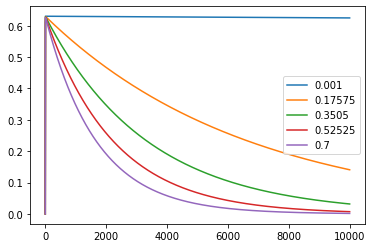

In [ ]:
for temp, dt_temp in zip(err_list, dt_list):
  plt.plot(np.arange(10000), temp, label = f'{dt_temp}')

plt.legend()
plt.show()

In [ ]:
for i in err_list[-1][:1000]:
  print(i)

0.0
0.31464705147479566
0.4717023353461769
0.5499489447575171
0.5887914466266623
0.6079353798517129
0.6172335130756246
0.6995718186434309
1.1538854490178816
2.827671506720405
8.39968155270437
26.371243123432695
83.76370113148161
266.4066727947533
847.2424834080368
2693.2559749041675
8553.043252293586
27112.473887654225
85677.57807022422
269422.955059391
841121.3006121046
2599679.2719757077
7929549.378348827
23790371.411821313
69974414.02899644
201139453.51934972
563420002.3173467
1534093481.6156585
4051572460.349869
10360273322.555943
25613054087.723274
61148628793.791435
140846886236.1432
312775106422.4404
669273377703.5989
1379373223191.9104
2737369676171.3374
5229509079810.242
9615988515671.617
17016985041751.836
28979560116101.086
47489363904619.51
74882014317633.53
113610830483480.89
165847209738621.22
232930649696978.78
314742856192275.8
409140168810985.25
511618008610867.3
615376129136624.1
711889341982872.0
791969877632051.0
847163214170742.2
871195404134922.6
861134707113217.0

In [ ]:
def Euler_backward():
  

In [ ]:
def Crank–Nicolson():
  l =  

In [ ]:
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

a = [1, 1]; b = [2, 2, 2]; c = [1, 1]
A = tridiag(a, b, c)

In [ ]:
A

array([[2, 1, 0],
       [1, 2, 1],
       [0, 1, 2]])

In [ ]:
np.full((1, 2), 1)

array([[1, 1]])